# EDA of Victims of Rape from 2001 to 2010

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("victims_of_rape.csv")
df.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [3]:
df.shape

(1050, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Area_Name                  1050 non-null   object
 1   Year                       1050 non-null   int64 
 2   Subgroup                   1050 non-null   object
 3   Rape_Cases_Reported        1050 non-null   int64 
 4   Victims_Above_50_Yrs       1050 non-null   int64 
 5   Victims_Between_10-14_Yrs  1050 non-null   int64 
 6   Victims_Between_14-18_Yrs  1050 non-null   int64 
 7   Victims_Between_18-30_Yrs  1050 non-null   int64 
 8   Victims_Between_30-50_Yrs  1050 non-null   int64 
 9   Victims_of_Rape_Total      1050 non-null   int64 
 10  Victims_Upto_10_Yrs        1050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 90.4+ KB


In [5]:
df.isnull().sum()

Area_Name                    0
Year                         0
Subgroup                     0
Rape_Cases_Reported          0
Victims_Above_50_Yrs         0
Victims_Between_10-14_Yrs    0
Victims_Between_14-18_Yrs    0
Victims_Between_18-30_Yrs    0
Victims_Between_30-50_Yrs    0
Victims_of_Rape_Total        0
Victims_Upto_10_Yrs          0
dtype: int64

No null value found.

In [6]:
df["Area_Name"].value_counts()

Haryana                      30
Karnataka                    30
Tamil Nadu                   30
Rajasthan                    30
Goa                          30
Punjab                       30
Meghalaya                    30
Uttarakhand                  30
Nagaland                     30
Chandigarh                   30
Puducherry                   30
Lakshadweep                  30
Uttar Pradesh                30
Himachal Pradesh             30
Madhya Pradesh               30
Maharashtra                  30
Kerala                       30
Odisha                       30
Arunachal Pradesh            30
Bihar                        30
Jharkhand                    30
Manipur                      30
Delhi                        30
Daman & Diu                  30
Andhra Pradesh               30
Chhattisgarh                 30
Sikkim                       30
Jammu & Kashmir              30
Gujarat                      30
Andaman & Nicobar Islands    30
Mizoram                      30
Dadra & 

In [7]:
df["Subgroup"].value_counts()

Total Rape Victims        350
Victims of Incest Rape    350
Victims of Other Rape     350
Name: Subgroup, dtype: int64

In [8]:
df["Year"].value_counts()

2010    105
2009    105
2008    105
2007    105
2006    105
2005    105
2004    105
2003    105
2002    105
2001    105
Name: Year, dtype: int64

In [9]:
df = df.drop(df[df["Subgroup"]=="Total Rape Victims"].index.values)

In [10]:
df.shape

(700, 11)

In [11]:
# check if all rape cases are reported
df[df['Victims_of_Rape_Total'] != df['Rape_Cases_Reported']].head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
152,Chandigarh,2001,Victims of Other Rape,16,0,8,4,2,3,17,0
272,Delhi,2001,Victims of Other Rape,372,0,78,152,58,41,374,45
275,Delhi,2002,Victims of Other Rape,371,0,48,40,207,49,375,31
284,Delhi,2005,Victims of Other Rape,626,2,111,45,402,25,634,49
287,Delhi,2006,Victims of Other Rape,597,2,107,255,148,21,600,67


From the above observation all the rape cases are not reported.so,store the number of unreported rape cases in another column

In [12]:
df["Unreported_cases"] = df["Victims_of_Rape_Total"] - df["Rape_Cases_Reported"]

In [13]:
df.sample(5)

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_cases
848,Rajasthan,2003,Victims of Other Rape,1018,7,11,29,727,238,1018,6,0
1006,Uttarakhand,2006,Victims of Incest Rape,6,0,3,0,2,1,6,0,0
625,Maharashtra,2009,Victims of Incest Rape,76,0,3,19,47,3,77,5,1
61,Arunachal Pradesh,2001,Victims of Incest Rape,0,0,0,0,0,0,0,0,0
661,Meghalaya,2001,Victims of Incest Rape,5,0,0,1,1,2,5,1,0


In [14]:
df.describe()

,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_cases
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,2005.500000,271.440000,1.400000,17.742857,39.814286,159.702857,45.177143,271.648571,7.811429,0.208571
std,2.874335,529.333679,4.063868,44.252845,100.575268,314.052888,104.780266,529.558298,17.094918,1.105034
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000
25%,2003.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,2005.500000,18.000000,0.000000,1.500000,3.000000,7.000000,1.000000,18.000000,1.000000,0.000000
75%,2008.000000,289.750000,0.000000,10.000000,20.250000,158.000000,33.250000,289.750000,6.000000,0.000000
max,2010.000000,3114.000000,43.000000,416.000000,816.000000,1834.000000,807.000000,3115.000000,126.000000,12.000000


Large difference between mean and std that means skewness is present in our data.
Large difference between 75% of the data and max data, that means outliers is also present in our data.

<AxesSubplot:>

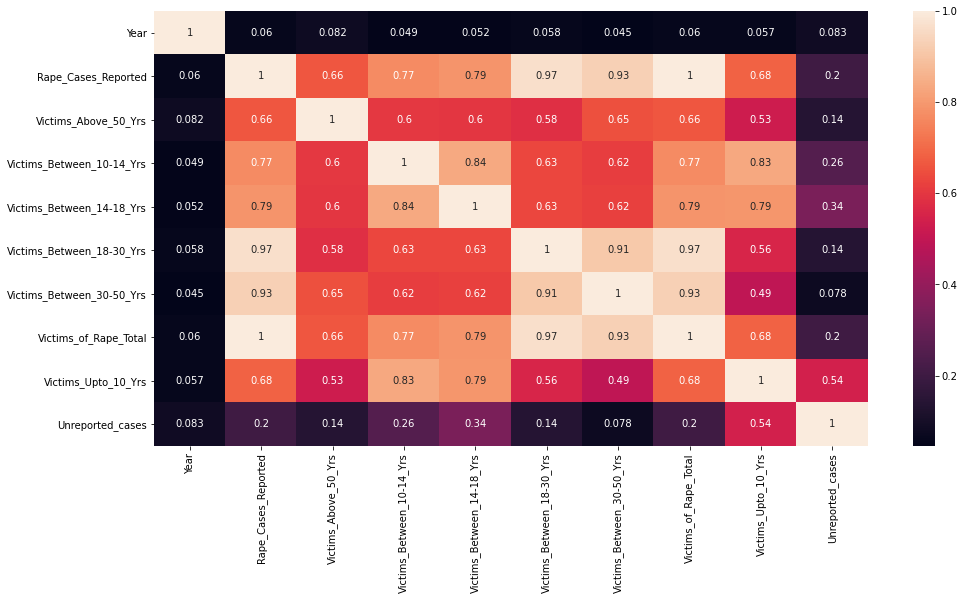

In [15]:
#find the coreelation between attributes.
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:xlabel='Rape_Cases_Reported', ylabel='Victims_Between_14-18_Yrs'>

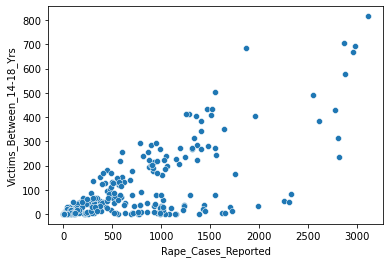

In [16]:
sns.scatterplot(x="Rape_Cases_Reported",y="Victims_Between_14-18_Yrs",data=df)

<AxesSubplot:xlabel='Rape_Cases_Reported', ylabel='Victims_Between_18-30_Yrs'>

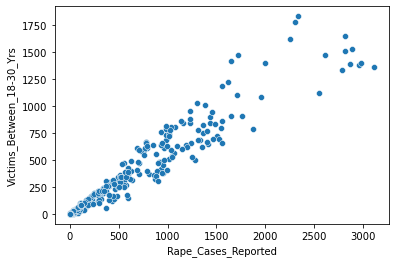

In [17]:
sns.scatterplot(x="Rape_Cases_Reported",y="Victims_Between_18-30_Yrs",data=df)

above scatter plot shows strong positive correlation between Rape Cases Reported and Victims Between 18-30 Yrs

<AxesSubplot:xlabel='Rape_Cases_Reported', ylabel='Victims_Between_30-50_Yrs'>

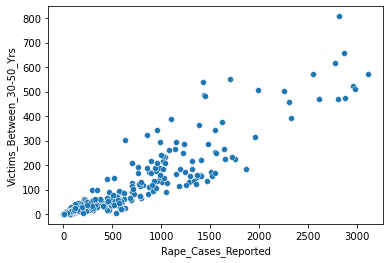

In [18]:
sns.scatterplot(x="Rape_Cases_Reported",y="Victims_Between_30-50_Yrs",data=df)

above scatter plot shows strong positive correlation between Rape Cases Reported and Victims Between 30-50 Yrs

In [19]:
#grouped data with area wise cases.
state_wise_cases = df.groupby("Area_Name").sum().reset_index()
state_wise_cases.drop("Year",axis=1,inplace=True)
state_wise_cases.head()

,Area_Name,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_cases
0,Andaman & Nicobar Islands,84,0,8,44,21,4,84,7,0
1,Andhra Pradesh,10696,99,1255,2011,5631,1270,10696,430,0
2,Arunachal Pradesh,412,0,48,10,316,19,412,19,0
3,Assam,12762,95,153,409,8507,3552,12762,46,0
4,Bihar,11263,39,102,500,8494,2097,11263,31,0


Text(0, 0.5, 'Reported rape case')

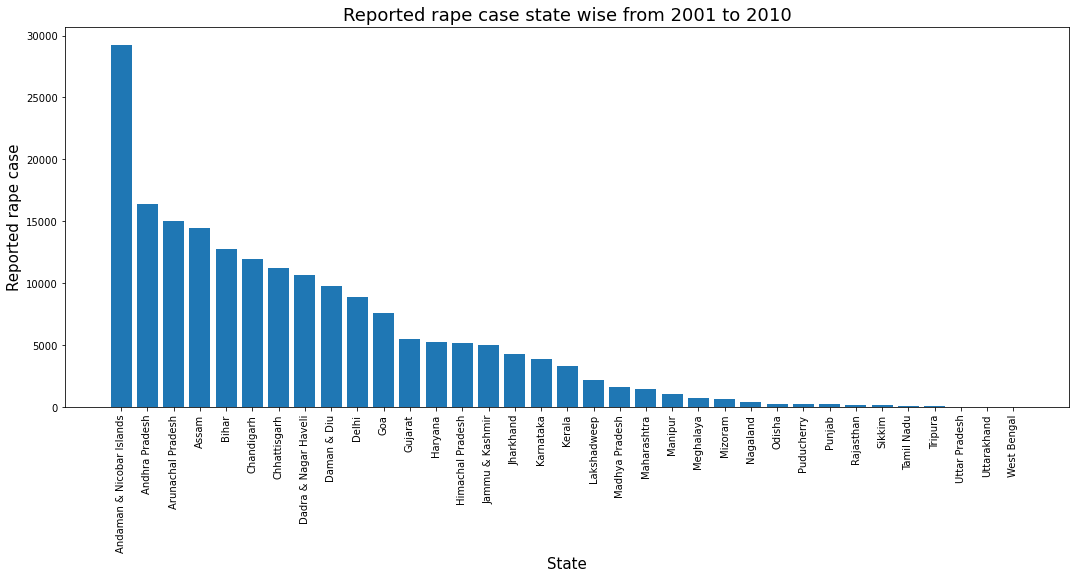

In [20]:
#plot the total number of rape cases reported in each state
plt.figure(figsize=(18,7))
plt.bar(state_wise_cases["Area_Name"],state_wise_cases["Rape_Cases_Reported"].sort_values(ascending = False),data=state_wise_cases)
plt.xticks(rotation="vertical")
plt.title("Reported rape case state wise from 2001 to 2010",fontsize=18)
plt.xlabel("State",fontsize=15)
plt.ylabel("Reported rape case",fontsize=15)

Andaman & Nicobar Islands has the most number of rape victims throughout the 10 years of timespan, Andhra Pradesh coming second and Arunachal Pradesh coming third to Andaman & Nicobar with almost half number of reported rape victims.

Text(0, 0.5, 'Unreported rape case')

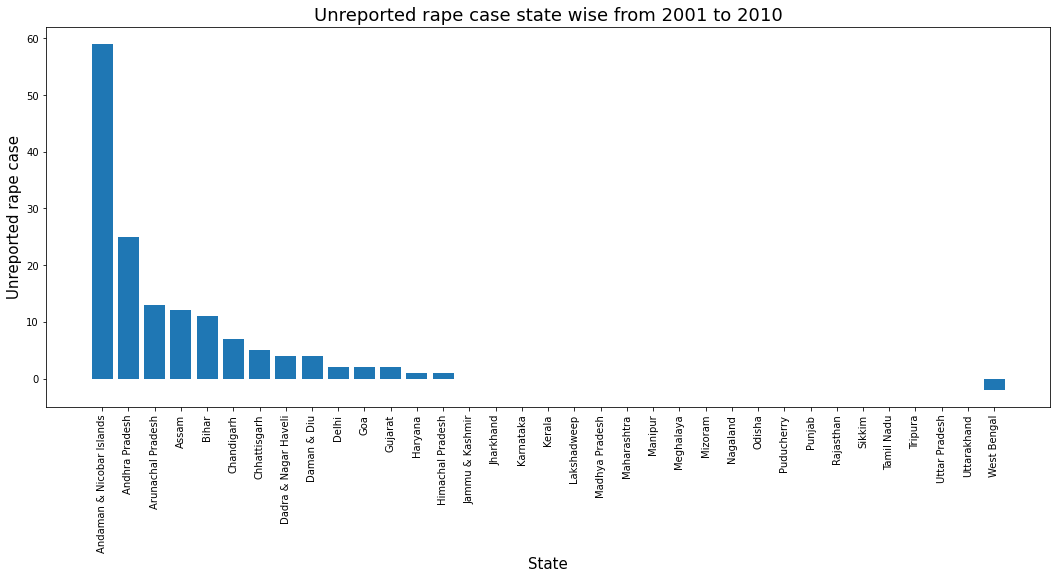

In [21]:
#plot unreported rape cases sorted by states throughout 2001 to 2010
plt.figure(figsize=(18,7))
plt.bar(state_wise_cases["Area_Name"],state_wise_cases["Unreported_cases"].sort_values(ascending = False),data=state_wise_cases)
plt.xticks(rotation="vertical")
plt.title("Unreported rape case state wise from 2001 to 2010",fontsize=18)
plt.xlabel("State",fontsize=15)
plt.ylabel("Unreported rape case",fontsize=15)

Andaman & Nicobar Islands has the most number of unreported rape cases.

Text(0, 0.5, 'Total rape case')

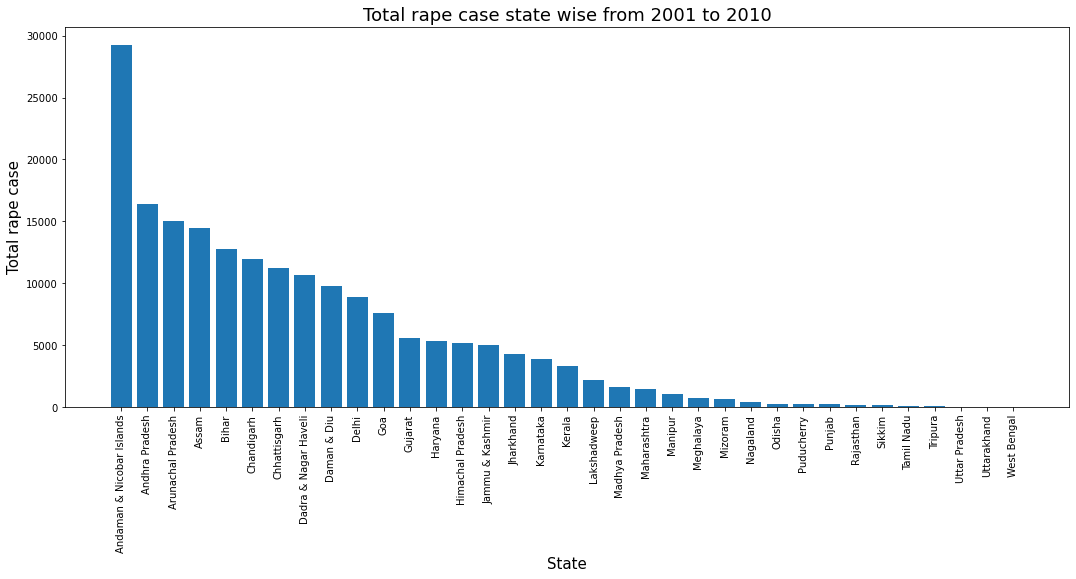

In [22]:
#plot total rape cases sorted by states throughout 2001 to 2010
plt.figure(figsize=(18,7))
plt.bar(state_wise_cases["Area_Name"],state_wise_cases["Victims_of_Rape_Total"].sort_values(ascending = False),data=state_wise_cases)
plt.xticks(rotation="vertical")
plt.title("Total rape case state wise from 2001 to 2010",fontsize=18)
plt.xlabel("State",fontsize=15)
plt.ylabel("Total rape case",fontsize=15)

In [23]:
#grouped data with year wise cases.
year_wise_cases = df.groupby("Year").sum().reset_index()
year_wise_cases

,Year,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs,Unreported_cases
0,2001,16075,68,1440,3911,7881,2248,16078,530,3
1,2002,16373,66,854,1325,10730,2992,16378,411,5
2,2003,15847,60,931,1792,9873,2811,15856,389,9
3,2004,18233,81,1090,2004,11343,3189,18239,532,6
4,2005,18359,111,1174,2344,10809,3381,18376,557,17
5,2006,19348,94,1081,3364,11312,3002,19365,512,17
6,2007,20737,133,1355,3152,11984,3530,20771,617,34
7,2008,21467,136,1331,3496,12299,3584,21485,639,18
8,2009,21397,95,1760,2912,12812,3124,21413,710,16
9,2010,22172,136,1404,3570,12749,3763,22193,571,21


Text(0, 0.5, 'Total rape case')

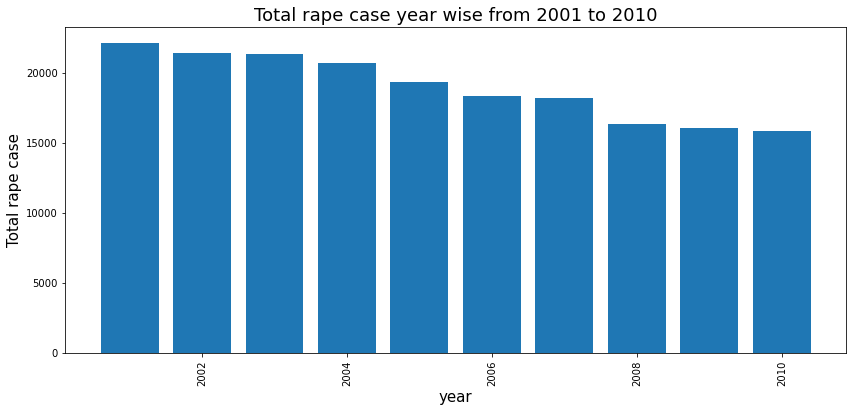

In [24]:
#plot total rape cases sorted by years from 2001 to 2010
plt.figure(figsize=(14,6))
plt.bar(year_wise_cases["Year"],year_wise_cases["Victims_of_Rape_Total"].sort_values(ascending = False),data=year_wise_cases)
plt.xticks(rotation="vertical")
plt.title("Total rape case year wise from 2001 to 2010",fontsize=18)
plt.xlabel("year",fontsize=15)
plt.ylabel("Total rape case",fontsize=15)

Total rape victims is very high in 2001. Rape victims gradually decrease from 2001 to 2010.

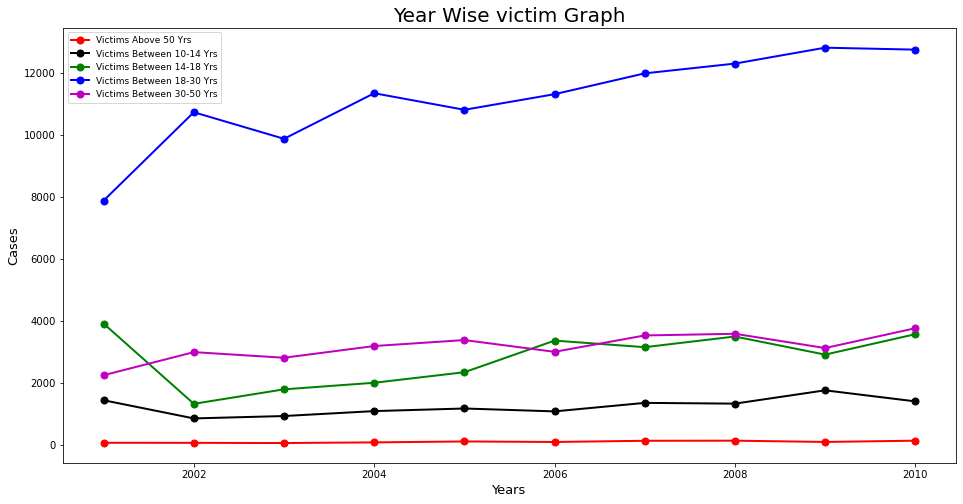

In [25]:
#plot total rape victims sorted by victims years throughout 2001 to 2010
plt.figure(figsize=(16,8))

plt.plot(year_wise_cases["Year"],year_wise_cases["Victims_Above_50_Yrs"],"ro-",linewidth = 2,markersize = 7,label = "Victims Above 50 Yrs")
plt.plot(year_wise_cases["Year"],year_wise_cases["Victims_Between_10-14_Yrs"],"ko-",linewidth = 2,markersize = 7,label = "Victims Between 10-14 Yrs")
plt.plot(year_wise_cases["Year"],year_wise_cases["Victims_Between_14-18_Yrs"],"go-",linewidth = 2,markersize = 7,label = "Victims Between 14-18 Yrs")
plt.plot(year_wise_cases["Year"],year_wise_cases["Victims_Between_18-30_Yrs"],"bo-",linewidth = 2,markersize = 7,label = "Victims Between 18-30 Yrs")
plt.plot(year_wise_cases["Year"],year_wise_cases["Victims_Between_30-50_Yrs"],"mo-",linewidth = 2,markersize = 7,label = "Victims Between 30-50 Yrs")

plt.title("Year Wise victim Graph",fontsize = 20)
plt.xlabel("Years",fontsize = 13)
plt.ylabel("Cases",fontsize = 13)
plt.legend(loc = 2,fontsize=9)
plt.show()

Victims of rape cases is very high in age between 18-30 years and gradually increase after 2005.Victims of rape cases is low in age of above 50 years throughout 10 years of span. 